In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_json('../../data/query/top_used_wish_queries.json', lines=True)

In [3]:
df

,query,cnt,gmv
0,iphone 12 pro max,727317,1.043449e+06
1,smart watch,716676,1.064979e+06
2,iphone,673123,7.356624e+05
3,dildo,648783,2.812065e+05
4,sex toys,645230,3.470768e+05
...,...,...,...
803002,industrial shelf,101,1.130594e+02
803003,parasoles coche,101,4.369584e+01
803004,sunglass face shield,101,4.403885e+02
803005,chinese mesh slippers for women,101,6.284896e+01


<AxesSubplot: ylabel='Frequency'>

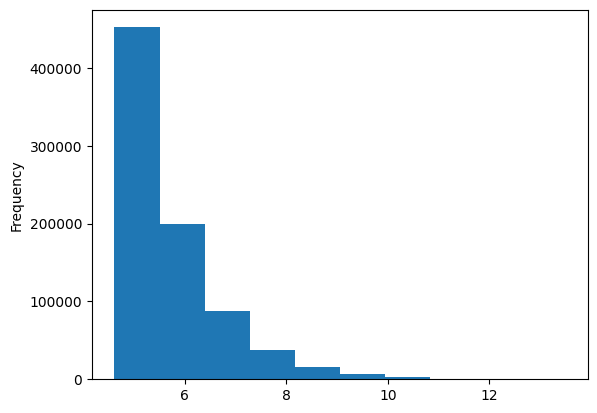

In [4]:
df.cnt.apply(np.log).plot.hist()

<AxesSubplot: ylabel='Frequency'>

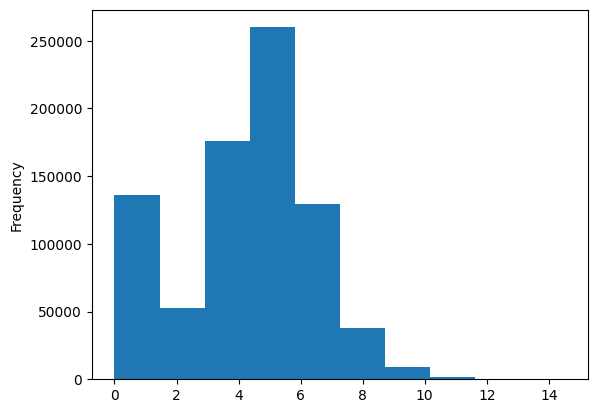

In [5]:
df.gmv.apply(lambda x: np.log(x + 1)).plot.hist()

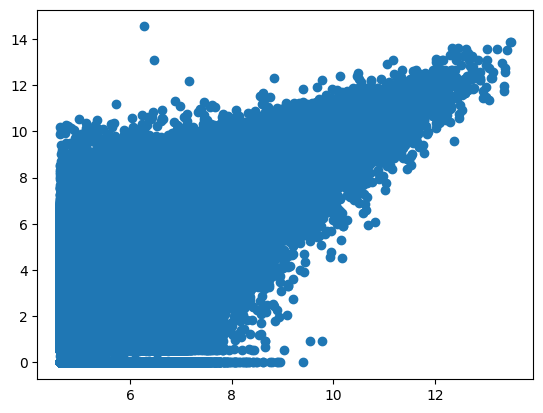

In [6]:
plt.scatter(df.cnt.apply(np.log), df.gmv.apply(lambda x: np.log(x + 1)))

<AxesSubplot: ylabel='Frequency'>

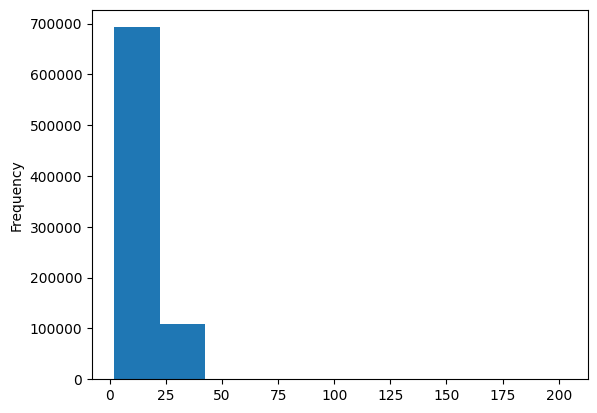

In [7]:
df['query'].apply(len).plot.hist()

In [8]:
df.head(2)

,query,cnt,gmv
0,iphone 12 pro max,727317,1.043449e+06
1,smart watch,716676,1.064979e+06


In [9]:
df['query_numwords'] = df['query'].apply(lambda x: len(x.split(' ')))

In [10]:
tmp = df.groupby('query_numwords').agg({
    'cnt': 'sum',
    'gmv': 'sum',
    'query': 'count'
})
tmp['gmv_ratio'] = tmp['gmv'].copy()
tmp['gmv_ratio'] = tmp['gmv_ratio'] / tmp['gmv_ratio'].sum() * 100
tmp['cnt_ratio'] = tmp['cnt'].copy()
tmp['cnt_ratio'] = tmp['cnt_ratio'] / tmp['cnt_ratio'].sum() * 100
tmp['query_ratio'] = tmp['query'].copy()
tmp['query_ratio'] = tmp['query_ratio'] / tmp['query_ratio'].sum() * 100
tmp

,cnt,gmv,query,gmv_ratio,cnt_ratio,query_ratio
query_numwords,,,,,,
1,168884494,1.041707e+08,128844,21.025940,25.483560,16.045190
2,255869662,2.029091e+08,317095,40.955426,38.609051,39.488448
3,153784258,1.218101e+08,226182,24.586294,23.205034,28.166878
4,63248834,5.061865e+07,93759,10.216929,9.543833,11.675988
5,16778792,1.271772e+07,28372,2.566961,2.531809,3.533220
6,3162526,2.415349e+06,6680,0.487517,0.477204,0.831873
7,689680,5.708068e+05,1527,0.115212,0.104068,0.190160
8,192070,1.606245e+05,373,0.032421,0.028982,0.046450
9,80758,5.772866e+04,126,0.011652,0.012186,0.015691


In [11]:
df_tolabel = pd.read_excel('../../data/query/Appen_Query_Understanding.xlsx')

In [12]:
df_join = df_tolabel.merge(df, on='query', how='inner')

In [13]:
len(df_join) / len(df_tolabel)

0.99911

In [16]:
len(df_join) / len(df)

0.12442108225706625

In [17]:
df_join.gmv.sum() / df.gmv.sum()

0.7441317029859842

In [18]:
df_join.cnt.sum() / df.cnt.sum()

0.7267467928884168

In [19]:
tmp = df_join.groupby('query_numwords').agg({
    'cnt': 'sum',
    'gmv': 'sum',
    'query': 'count'
})
tmp['gmv_ratio'] = tmp['gmv'].copy()
tmp['gmv_ratio'] = tmp['gmv_ratio'] / tmp['gmv_ratio'].sum() * 100
tmp['cnt_ratio'] = tmp['cnt'].copy()
tmp['cnt_ratio'] = tmp['cnt_ratio'] / tmp['cnt_ratio'].sum() * 100
tmp['query_ratio'] = tmp['query'].copy()
tmp['query_ratio'] = tmp['query_ratio'] / tmp['query_ratio'].sum() * 100
tmp.sort_values('query_ratio', ascending=False)

,cnt,gmv,query,gmv_ratio,cnt_ratio,query_ratio
query_numwords,,,,,,
2,184572398,1.554774e+08,39643,42.172292,38.322511,39.678314
3,102925245,8.443518e+07,23934,22.902530,21.370226,23.955320
1,139781040,8.519716e+07,22346,23.109211,29.022544,22.365906
4,41869853,3.435330e+07,10331,9.318123,8.693380,10.340203
5,10301234,7.649483e+06,2866,2.074876,2.138831,2.868553
6,1664221,1.200775e+06,602,0.325703,0.345540,0.602536
7,330656,2.486579e+05,125,0.067447,0.068654,0.125111
8,112967,7.973401e+04,47,0.021627,0.023455,0.047042
9,52779,2.448283e+04,11,0.006641,0.010958,0.011010


In [22]:
df['query_uniq_numwords'] = df['query'].apply(lambda x: len(set(x.split(" "))))

In [25]:
len(df[df.query_uniq_numwords != df.query_numwords]) / len(df)

0.00457405726226546

In [27]:
df[df.query_uniq_numwords != df.query_numwords]

,query,cnt,gmv,query_numwords,query_uniq_numwords
56,free stuff and free shipping,262985,38397.398438,5,4
914,lingerie for women for sex,54519,20875.445312,5,4
1205,free items and free shipping,44896,5618.632324,5,4
1329,hair extensions human hair,42128,50767.156250,4,3
1457,hunter x hunter,39656,22564.582031,3,2
...,...,...,...,...,...
800921,hawaiian jewelry by honolulu jewelry company,101,7.510000,6,5
801739,sweat hunter x hunter,101,197.863586,4,3
801755,hair shampoo for hair growth,101,107.126137,5,4
802327,sexy lengire for women for sex,101,34.775669,6,5
